In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split , KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor


In [ ]:
df = pd.read_excel('/content/Customer_Online_Transaction_data.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.duplicated().sum()

5268

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [ ]:
null_rows = df[df['Description'].isnull()]
print(null_rows)

       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
622       536414     22139         NaN        56 2010-12-01 11:52:00   
1970      536545     21134         NaN         1 2010-12-01 14:32:00   
1971      536546     22145         NaN         1 2010-12-01 14:33:00   
1972      536547     37509         NaN         1 2010-12-01 14:33:00   
1987      536549    85226A         NaN         1 2010-12-01 14:34:00   
...          ...       ...         ...       ...                 ...   
535322    581199     84581         NaN        -2 2011-12-07 18:26:00   
535326    581203     23406         NaN        15 2011-12-07 18:31:00   
535332    581209     21620         NaN         6 2011-12-07 18:35:00   
536981    581234     72817         NaN        27 2011-12-08 10:33:00   
538554    581408     85175         NaN        20 2011-12-08 14:06:00   

        UnitPrice  CustomerID         Country  
622           0.0         NaN  United Kingdom  
1970          0.0         NaN  United K

In [ ]:
df.fillna({"Description" :  'Unknown'},inplace=True)

In [ ]:
#df.fillna({"CustomerID" :  1},inplace=True)
df['CustomerID_bainary'] = df['CustomerID'].copy()


In [ ]:
df.fillna({"CustomerID_bainary" :  1},inplace=True)
df['CustomerID_bainary'] = df.apply(lambda x: 0 if x['CustomerID_bainary'] != 1 else 1, axis=1)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_bainary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


In [ ]:
df['CustomerID_bainary'].unique()

array([0, 1])

In [ ]:
# Assuming you have a DataFrame named df with 'CustomerID', 'Country', 'InvoiceNo', and 'CustomerID_Binary' columns

# Create a temporary DataFrame to store the mapping of 'CustomerID' and 'CustomerID_Binary'
temp_df = df.groupby(['Country', 'InvoiceNo'])['CustomerID'].first().reset_index()

# Merge the temporary DataFrame with the original DataFrame on the groupby columns
df = pd.merge(df, temp_df, on=['Country', 'InvoiceNo'], suffixes=('', '_temp'))

# Fill null values in 'CustomerID' based on 'CustomerID_Binary'
df['CustomerID'] = df['CustomerID'].fillna(df['CustomerID_Binary'])

# Drop the temporary columns used for merging
df = df.drop(columns=['CustomerID_temp', 'CustomerID_Binary'])

# Converting the 'CustomerID' column back to numeric if necessary
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce')

# Optional: If you want to replace NaN with a specific value, you can use fillna again
# df['CustomerID'] = df['CustomerID'].fillna(your_specific_value)

In [ ]:
df['CustomerID'] = df.groupby(['Country', 'InvoiceNo'])['CustomerID_Binary'].transform(lambda x: x.ffill().bfill())

print("Number of missing values in 'CustomerID' after filling:", df['CustomerID'].isnull().sum())

In [ ]:
df['CustomerID'] = df.apply(lambda x: x.ffill().bfill() if x['CustomerID_bainary'] != 1 else 1, axis=1)
df

In [ ]:
df['CustomerID']=df.groupby(['Country','InvoiceNo'])['CustomerID'].ffill().bfill()

In [ ]:
ff = df.groupby(['Country', 'InvoiceNo'])['CustomerID'].ffill()
bf = df.groupby(['Country', 'InvoiceNo'])['CustomerID'].bfill()

In [ ]:
df['CustomerID'].fillna(ff,inplace=True)
df['CustomerID'].fillna(bf,inplace=True)

In [ ]:
df.fillna({"Description" :  ff},inplace=True)
df.fillna({"Description" :  bf},inplace=True)

In [ ]:
df['CustomerID'] = df.groupby(['Country', 'InvoiceNo'])['CustomerID'].ffill()
df['CustomerID'] = df.groupby(['Country', 'InvoiceNo'])['CustomerID'].bfill()

In [ ]:
df['CustomerID_bainary']

In [ ]:
remaining_missing = df['CustomerID'].isnull().sum()
remaining_missing

0

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df['CustomerID'].interpolate(method='linear', inplace=True)

In [ ]:
df['CustomerID'].astype(int)

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 536641, dtype: int64

In [ ]:
df['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,15270.387231
std,219.130156,97.233118,1719.444122
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13883.000000
50%,3.000000,2.080000,15117.000000
75%,10.000000,4.130000,16775.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df = df[df['Quantity']>0]
df.Quantity.describe()

count    526054.000000
mean         10.730874
std         157.591838
min           1.000000
25%           1.000000
50%           4.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
df = df[df['UnitPrice']>0]
df.UnitPrice.describe()

count    524878.000000
mean          3.922573
std          36.093028
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [ ]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
import datetime as dt
now = dt.date(2011,12,9)

In [ ]:
df['date'] = pd.DatetimeIndex(df.InvoiceDate).date
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09


In [ ]:
recency_df = df.groupby(['CustomerID'],as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [ ]:
recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [ ]:
recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

In [ ]:
frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True)
frequency_df = frequency_df.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [ ]:
df['Total_cost'] = df['UnitPrice'] * df['Quantity']

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60


In [ ]:
monetary_df=df.groupby('CustomerID',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['CustomerID','Monetary']

In [ ]:
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
rf = recency_df.merge(frequency_df,left_on='CustomerID',right_on='CustomerID')

#combibe rf frame with monetary values..

rfm = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID')

rfm.set_index('CustomerID',inplace=True)

In [ ]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40


In [ ]:
df_merg = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID')

In [ ]:
rfm_segmentation = rfm.copy()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

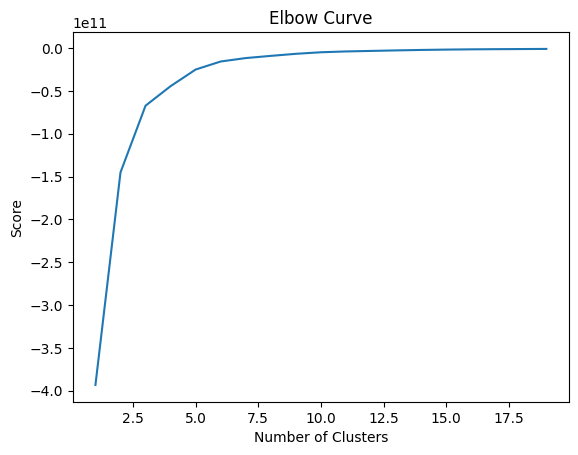

In [ ]:
from sklearn.cluster import KMeans
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that.
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
rfm_segmentation['cluster'] = kmeans.labels_

In [ ]:
rfm_segmentation[rfm_segmentation.cluster == 0].head(10)

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12347.0,2,7,4310.00,0
12348.0,75,4,1797.24,0
12349.0,18,1,1757.55,0
12350.0,310,1,334.40,0
12352.0,36,8,2506.04,0
12353.0,204,1,89.00,0
12354.0,232,1,1079.40,0
12355.0,214,1,459.40,0
12356.0,22,3,2811.43,0


In [ ]:
gb = rfm_segmentation.groupby(['cluster', 'Recency'])

<Axes: xlabel='cluster', ylabel='Recency'>

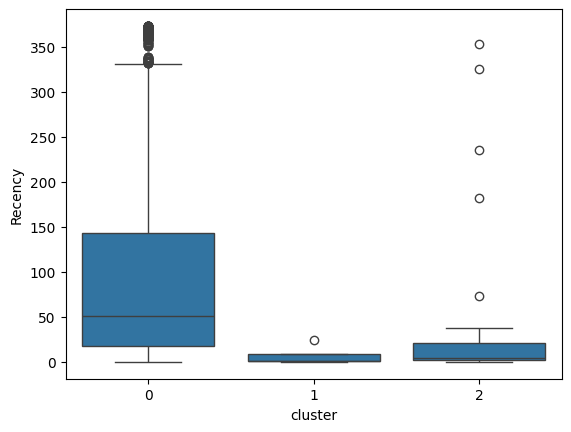

In [ ]:
sns.boxplot(data=rfm_segmentation, x='cluster', y='Recency')


<Axes: xlabel='cluster', ylabel='Frequency'>

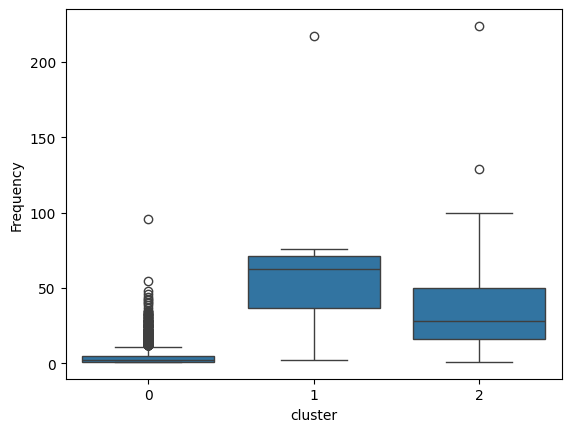

In [ ]:
sns.boxplot(data=rfm_segmentation, x='cluster', y='Frequency')

<Axes: xlabel='cluster', ylabel='Monetary'>

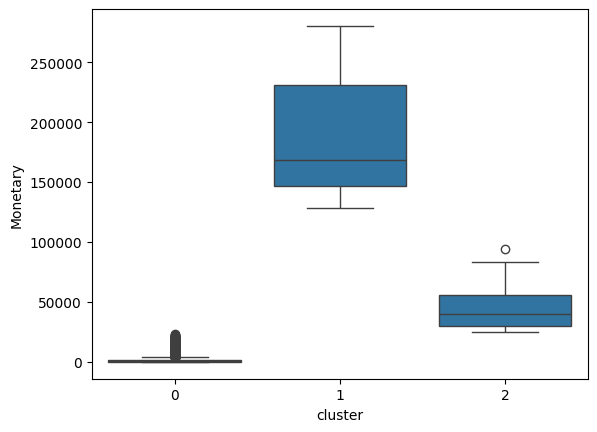

In [ ]:
sns.boxplot(data=rfm_segmentation, x='cluster', y='Monetary')

In [ ]:
rfm = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID')

In [ ]:
df_merge = pd.merge(df,rfm_segmentation)
df_merge

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [ ]:
df_mrg = df.merge(rfm_segmentation,left_on='CustomerID',right_on='CustomerID')

#combibe rf frame with monetary values..

#df_merge = df_mrg.merge(df,left_on='CustomerID',right_on='CustomerID')

df_mrg.set_index('CustomerID',inplace=True)

In [ ]:
df_mrg

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,date,Total_cost,Recency,Frequency,Monetary,cluster
CustomerID,,,,,,,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010-12-01,15.30,372,34,5391.21,0
17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12-01,20.34,372,34,5391.21,0
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010-12-01,22.00,372,34,5391.21,0
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12-01,20.34,372,34,5391.21,0
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12-01,20.34,372,34,5391.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12713.0,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,Germany,2011-12-09,15.00,0,1,848.55,0
12713.0,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,Germany,2011-12-09,10.20,0,1,848.55,0
12713.0,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,Germany,2011-12-09,10.20,0,1,848.55,0


In [ ]:
df_mrg.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 524878 entries, 17850.0 to 12713.0
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   Country      524878 non-null  object        
 7   date         524878 non-null  object        
 8   Total_cost   524878 non-null  float64       
 9   Recency      524878 non-null  int64         
 10  Frequency    524878 non-null  int64         
 11  Monetary     524878 non-null  float64       
 12  cluster      524878 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(3), object(5)
memory usage: 54.1+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           524878 non-null  object        
 1   StockCode           524878 non-null  object        
 2   Description         524878 non-null  object        
 3   Quantity            524878 non-null  int64         
 4   InvoiceDate         524878 non-null  datetime64[ns]
 5   UnitPrice           524878 non-null  float64       
 6   CustomerID          524878 non-null  float64       
 7   Country             524878 non-null  object        
 8   CustomerID_bainary  524878 non-null  int64         
 9   date                524878 non-null  object        
 10  Total_cost          524878 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 48.1+ MB


In [ ]:
gb1=df_mrg.groupby("Country").agg({"Total_cost":'mean'})
print(gb1)

                      Total_cost
Country                         
Australia             117.234386
Austria                25.624824
Bahrain                41.896667
Belgium                20.283772
Brazil                 35.737500
Canada                 24.280662
Channel Islands        27.363507
Cyprus                 22.392786
Czech Republic         33.069600
Denmark                49.882474
EIRE                   35.936098
European Community     21.670833
Finland                32.913985
France                 24.979191
Germany                25.338327
Greece                 32.831172
Hong Kong              55.296429
Iceland                23.681319
Israel                 27.840445
Italy                  23.064960
Japan                 116.561900
Lebanon                37.641778
Lithuania              47.458857
Malta                  24.335625
Netherlands           121.003111
Norway                 33.767918
Poland                 22.226212
Portugal               22.575771
RSA       

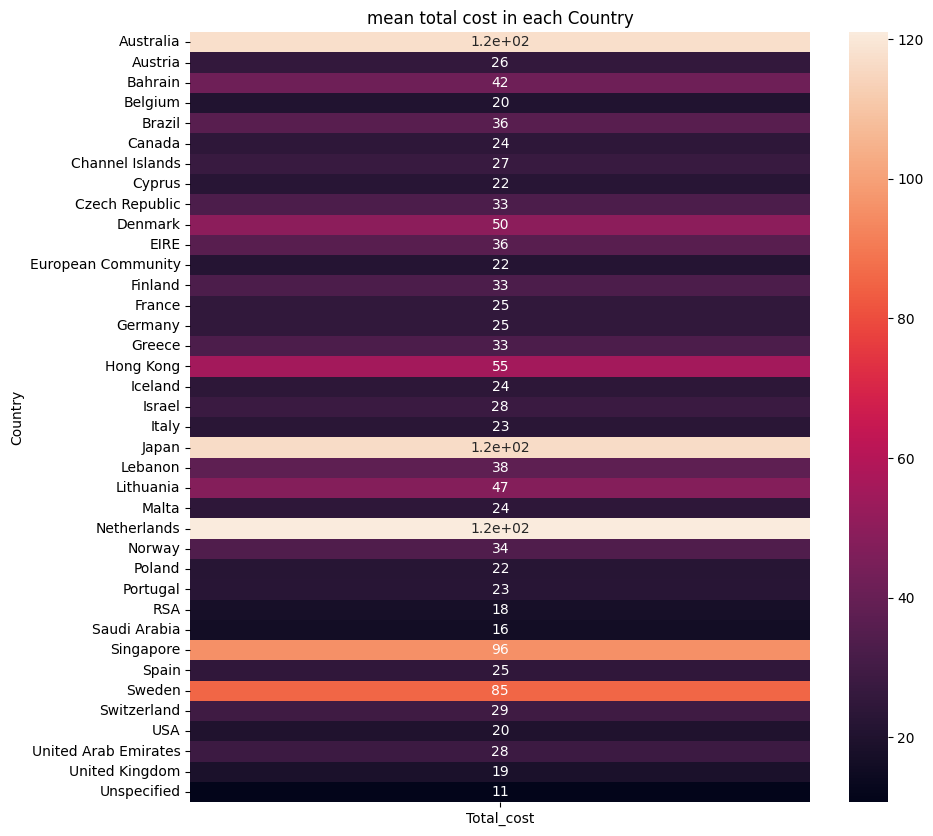

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(gb1,annot= True)
plt.title("mean total cost in each Country")
plt.show()

In [ ]:
gb2=df_mrg.groupby("Country").agg({"Recency":'mean',"Frequency":'mean',"Monetary":'mean'})
print(gb2)

                         Recency   Frequency       Monetary
Country                                                    
Australia              37.961897   19.804403   79376.250229
Austria                73.917085    2.567839    1794.838166
Bahrain               206.722222    1.277778     449.796667
Belgium                43.800098    7.025603    3864.299769
Brazil                238.000000    1.000000    1143.600000
Canada                154.264901    2.788079    2643.065166
Channel Islands        76.720214    5.262383    4903.755756
Cyprus                 64.781095    3.409619    3794.675124
Czech Republic         21.000000    3.000000    7870.430000
Denmark                43.060526    2.778947    2870.684237
EIRE                   10.634471  169.012438  140792.668601
European Community    141.000000    5.000000    4336.470000
Finland                41.839416    6.503650    4604.014847
France                 33.792421   10.064585    6640.896920
Germany                41.353130   10.70

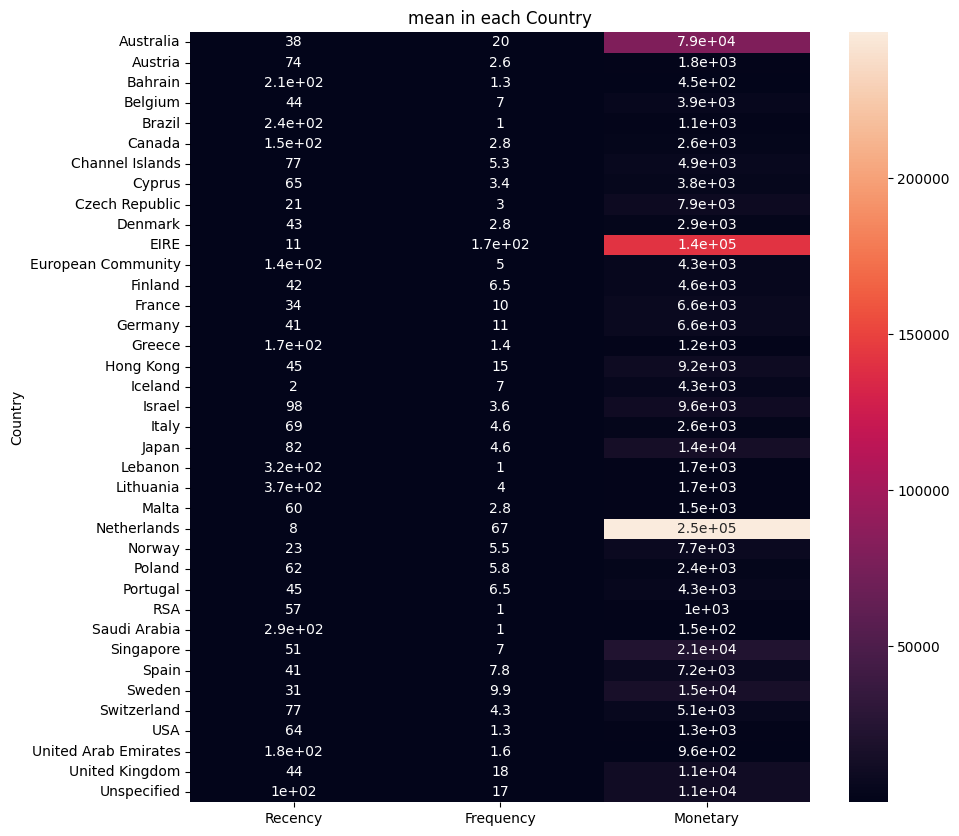

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(gb2,annot= True)
plt.title("mean in each Country")
plt.show()

In [ ]:
df_mrg.corr()['Total_cost']

<ipython-input-152-c5bb8f19e828>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mrg.corr()['Total_cost']


Quantity              0.907402
UnitPrice             0.137381
CustomerID_bainary   -0.014947
Total_cost            1.000000
Recency              -0.002738
Frequency             0.006958
Monetary              0.057358
cluster               0.032756
Name: Total_cost, dtype: float64

In [ ]:
gb3=df_mrg.groupby("Country").agg({"Recency":'mean'})
print(gb3)

                         Recency
Country                         
Australia              37.961897
Austria                73.917085
Bahrain               206.722222
Belgium                43.800098
Brazil                238.000000
Canada                154.264901
Channel Islands        76.720214
Cyprus                 64.781095
Czech Republic         21.000000
Denmark                43.060526
EIRE                   10.634471
European Community    141.000000
Finland                41.839416
France                 33.792421
Germany                41.353130
Greece                170.903448
Hong Kong              45.496429
Iceland                 2.000000
Israel                 97.719178
Italy                  68.726913
Japan                  82.077882
Lebanon               316.000000
Lithuania             366.000000
Malta                  59.767857
Netherlands             8.035608
Norway                 22.999066
Poland                 61.754545
Portugal               44.859249
RSA       

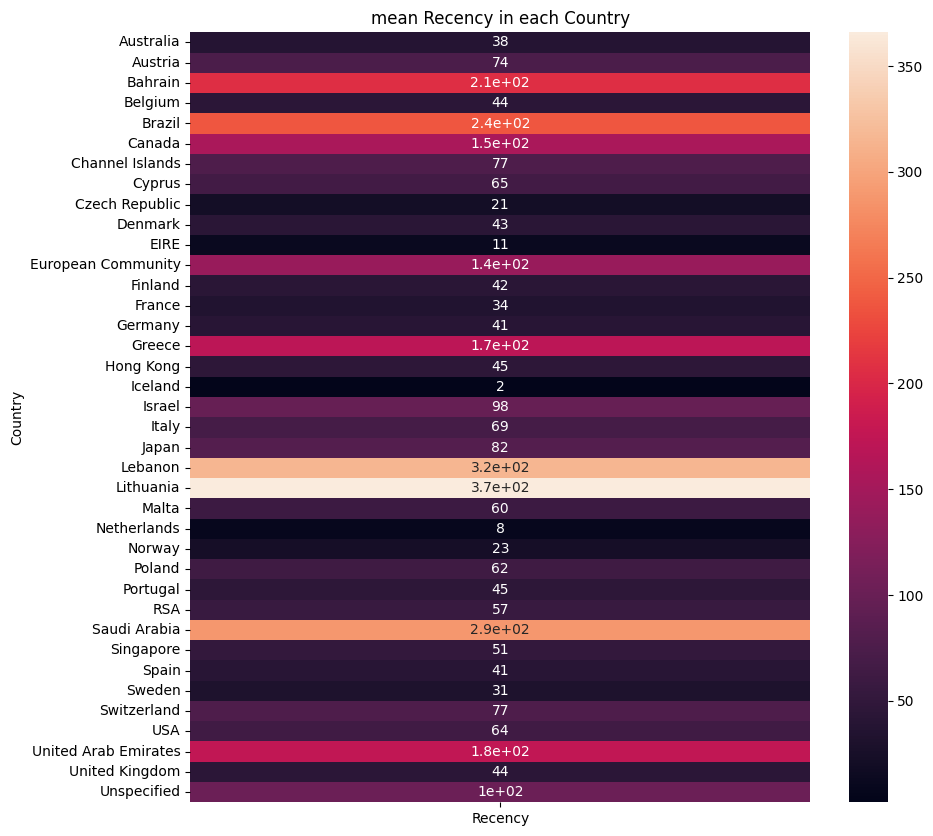

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(gb3,annot= True)
plt.title("mean Recency in each Country")
plt.show()

In [ ]:
gb4=df_mrg.groupby("Country").agg({"Monetary":'mean'})
print(gb4)

                           Monetary
Country                            
Australia              79376.250229
Austria                 1794.838166
Bahrain                  449.796667
Belgium                 3864.299769
Brazil                  1143.600000
Canada                  2643.065166
Channel Islands         4903.755756
Cyprus                  3794.675124
Czech Republic          7870.430000
Denmark                 2870.684237
EIRE                  140792.668601
European Community      4336.470000
Finland                 4604.014847
France                  6640.896920
Germany                 6571.648811
Greece                  1206.207172
Hong Kong               9151.849571
Iceland                 4310.000000
Israel                  9646.811952
Italy                   2564.292731
Japan                  14054.001028
Lebanon                 1693.880000
Lithuania               1661.060000
Malta                   1452.620804
Netherlands           246761.059245
Norway                  7707

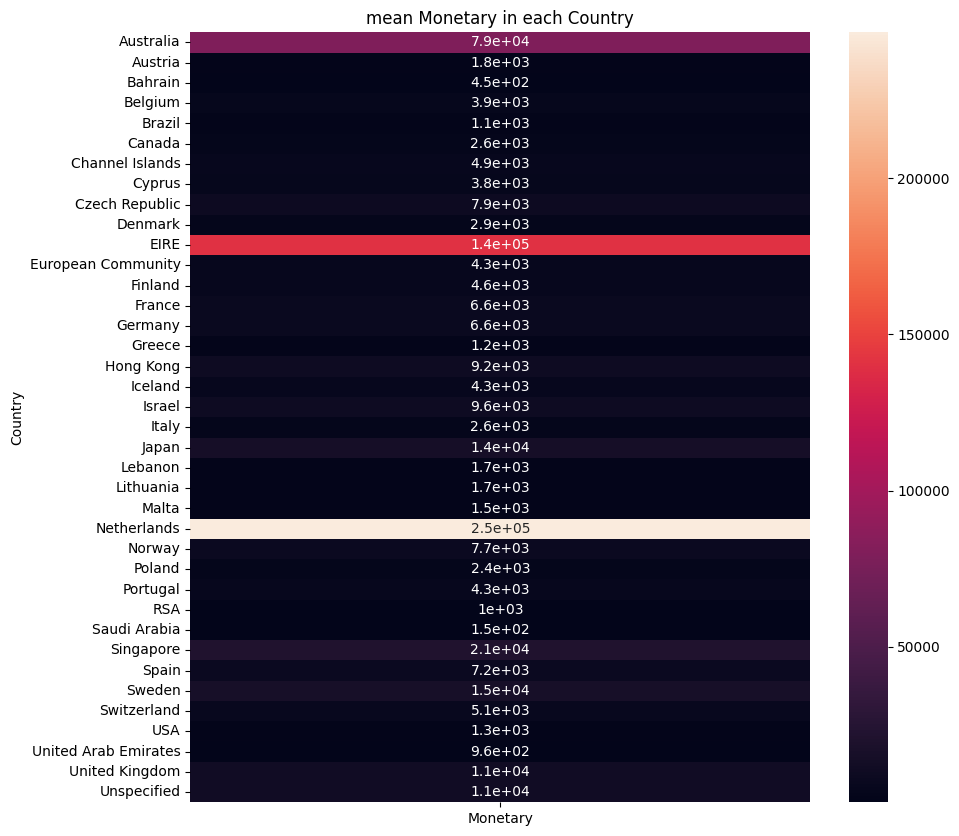

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(gb4,annot= True)
plt.title("mean Monetary in each Country")
plt.show()

In [ ]:
gb4=df_mrg.groupby("Country").agg({"Monetary":'mean'})
print(gb4)

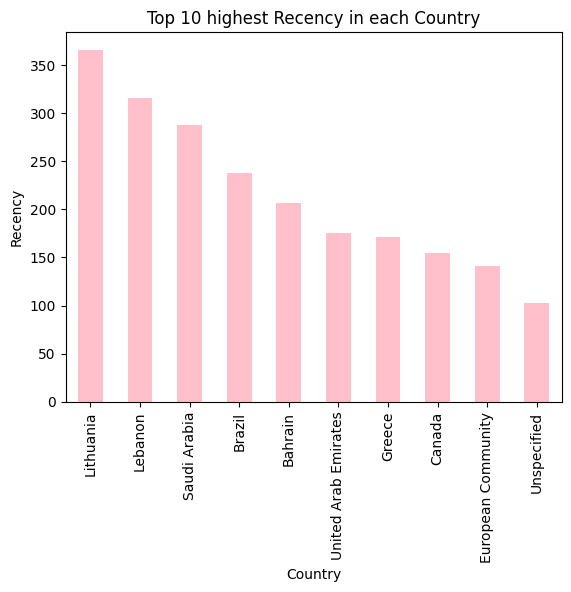

In [ ]:
_avg_by_Country = df_mrg.groupby('Country')['Recency'].mean()
_avg_by_Country = _avg_by_Country.nlargest(10)
_avg_by_Country.plot(kind='bar', color='pink')
plt.title('Top 10 highest Recency in each Country')
plt.xlabel('Country')
plt.ylabel('Recency')
plt.show()

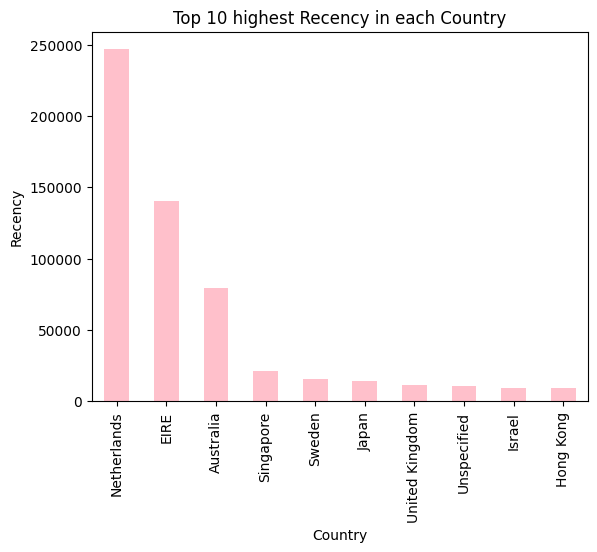

In [ ]:
_avg_by_Country = df_mrg.groupby('Country')['Monetary'].mean()
_avg_by_Country = _avg_by_Country.nlargest(10)
_avg_by_Country.plot(kind='bar', color='pink')
plt.title('Top 10 highest Monetary in each Country')
plt.xlabel('Country')
plt.ylabel('Monetary')
plt.show()

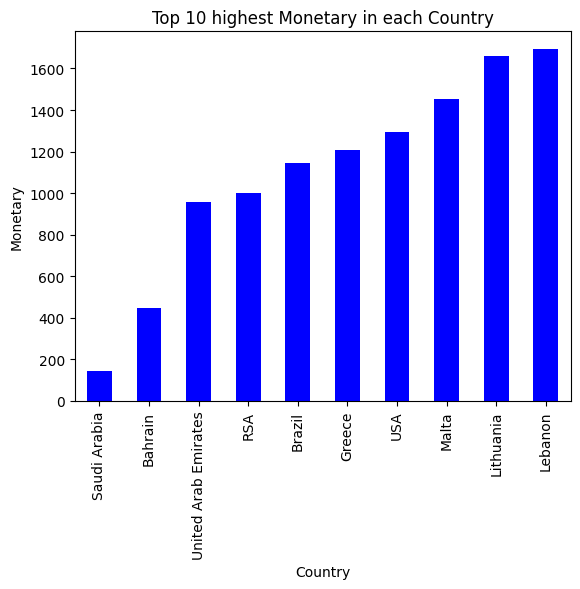

In [ ]:
_avg_by_Country = df_mrg.groupby('Country')['Monetary'].mean()
_avg_by_Country = _avg_by_Country.nsmallest(10)
_avg_by_Country.plot(kind='bar', color='blue')
plt.title('Top 10 highest Monetary in each Country')
plt.xlabel('Country')
plt.ylabel('Monetary')
plt.show()

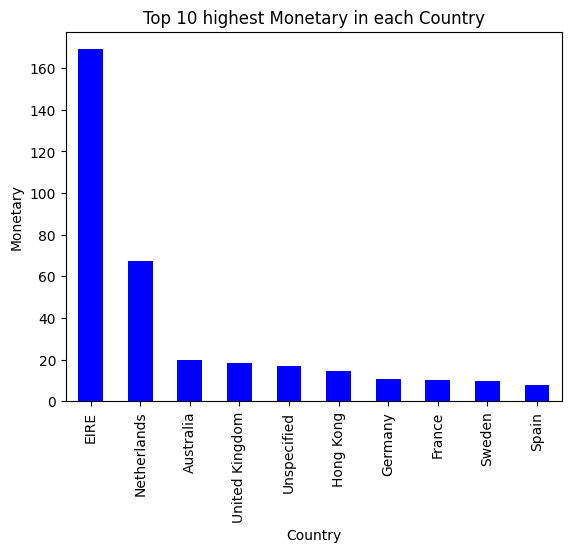

In [ ]:
_avg_by_Country = df_mrg.groupby('Country')['Frequency'].mean()
_avg_by_Country = _avg_by_Country.nlargest(10)
_avg_by_Country.plot(kind='bar', color='blue')
plt.title('Top 10 highest Monetary in each Country')
plt.xlabel('Country')
plt.ylabel('Monetary')
plt.show()

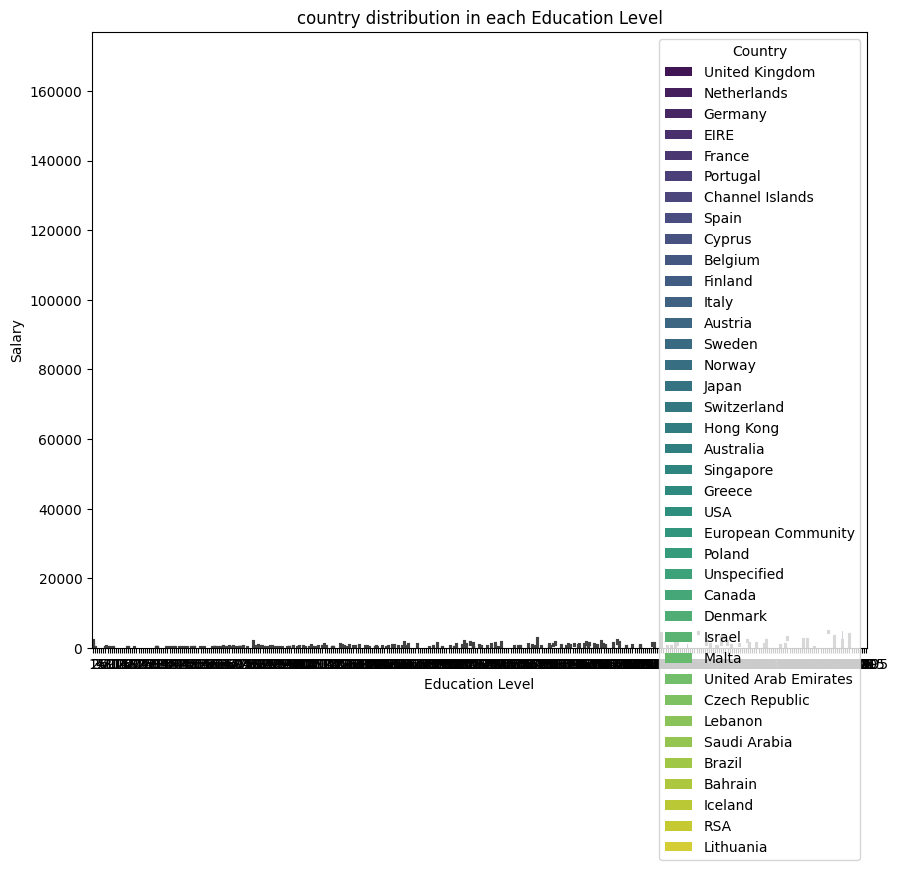

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Quantity", y="Total_cost", hue="Country", data=df.reset_index(), palette="viridis")
plt.title("country distribution in each Education Level")
plt.xlabel("Education Level")
plt.ylabel("Salary")
plt.legend(title="Country", loc="upper right")
plt.show()

In [ ]:
gb2=df_mrg.groupby("Quantity").agg({"Total_cost":'mean'})
print(gb2)

             Total_cost
Quantity               
1              6.910848
2              8.703527
3             10.451621
4             14.844918
5             12.804208
...                 ...
3906        3202.920000
4300        3096.000000
4800        1008.000000
74215      77183.600000
80995     168469.600000

[375 rows x 1 columns]


In [ ]:
df2 = df_mrg.copy()

In [ ]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,date,Total_cost,Recency,Frequency,Monetary,cluster
CustomerID,,,,,,,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010-12-01,15.30,372,34,5391.21,0
17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12-01,20.34,372,34,5391.21,0
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010-12-01,22.00,372,34,5391.21,0
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12-01,20.34,372,34,5391.21,0
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12-01,20.34,372,34,5391.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12713.0,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,Germany,2011-12-09,15.00,0,1,848.55,0
12713.0,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,Germany,2011-12-09,10.20,0,1,848.55,0
12713.0,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,Germany,2011-12-09,10.20,0,1,848.55,0


In [ ]:
df3 = df_mrg.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 524878 entries, 17850.0 to 12713.0
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   Country      524878 non-null  object        
 7   date         524878 non-null  object        
 8   Total_cost   524878 non-null  float64       
 9   Recency      524878 non-null  int64         
 10  Frequency    524878 non-null  int64         
 11  Monetary     524878 non-null  float64       
 12  cluster      524878 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(3), object(5)
memory usage: 54.1+ MB


In [ ]:
df2=df2.astype(str)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 524878 entries, 17850.0 to 12713.0
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    524878 non-null  object
 1   StockCode    524878 non-null  object
 2   Description  524878 non-null  object
 3   Quantity     524878 non-null  object
 4   InvoiceDate  524878 non-null  object
 5   UnitPrice    524878 non-null  object
 6   Country      524878 non-null  object
 7   date         524878 non-null  object
 8   Total_cost   524878 non-null  object
 9   Recency      524878 non-null  object
 10  Frequency    524878 non-null  object
 11  Monetary     524878 non-null  object
 12  cluster      524878 non-null  object
dtypes: object(13)
memory usage: 56.1+ MB


In [ ]:
df2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
date           0
Total_cost     0
Recency        0
Frequency      0
Monetary       0
cluster        0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
label_encoder = LabelEncoder()
for col in df2.columns:
  if df2[col].dtype == 'object':
    df2[col] = label_encoder.fit_transform(df2[col])

In [ ]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,date,Total_cost,Recency,Frequency,Monetary,cluster
CustomerID,,,,,,,,,,,,,
17850.0,0,3407,3844,284,0,579,36,0,993,244,31,3165,0
17850.0,0,2729,3852,284,0,828,36,0,1694,244,31,3165,0
17850.0,0,2953,888,336,0,586,36,0,1899,244,31,3165,0
17850.0,0,2897,1859,284,0,828,36,0,1694,244,31,3165,0
17850.0,0,2896,2849,284,0,828,36,0,1694,244,31,3165,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12713.0,19949,1857,3182,28,18490,83,14,304,982,0,0,3991,0
12713.0,19949,1772,2318,28,18490,58,14,304,134,0,0,3991,0
12713.0,19949,1773,2319,28,18490,58,14,304,134,0,0,3991,0


In [ ]:
df4 = df2.copy()

In [ ]:
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,date,Total_cost,Recency,Frequency,Monetary,cluster
CustomerID,,,,,,,,,,,,,
17850.0,0,3407,3844,284,0,579,36,0,993,244,31,3165,0
17850.0,0,2729,3852,284,0,828,36,0,1694,244,31,3165,0
17850.0,0,2953,888,336,0,586,36,0,1899,244,31,3165,0
17850.0,0,2897,1859,284,0,828,36,0,1694,244,31,3165,0
17850.0,0,2896,2849,284,0,828,36,0,1694,244,31,3165,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12713.0,19949,1857,3182,28,18490,83,14,304,982,0,0,3991,0
12713.0,19949,1772,2318,28,18490,58,14,304,134,0,0,3991,0
12713.0,19949,1773,2319,28,18490,58,14,304,134,0,0,3991,0


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 524878 entries, 17850.0 to 12713.0
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   InvoiceNo    524878 non-null  int64
 1   StockCode    524878 non-null  int64
 2   Description  524878 non-null  int64
 3   Quantity     524878 non-null  int64
 4   InvoiceDate  524878 non-null  int64
 5   UnitPrice    524878 non-null  int64
 6   Country      524878 non-null  int64
 7   date         524878 non-null  int64
 8   Total_cost   524878 non-null  int64
 9   Recency      524878 non-null  int64
 10  Frequency    524878 non-null  int64
 11  Monetary     524878 non-null  int64
 12  cluster      524878 non-null  int64
dtypes: int64(13)
memory usage: 56.1 MB


In [ ]:
df2['cluster'].value_counts()

0    461033
2     49085
1     14760
Name: cluster, dtype: int64

In [ ]:
columns_to_scale = df2.columns[df2.columns != 'cluster']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)

df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,date,Total_cost,Recency,Frequency,Monetary,cluster
CustomerID,,,,,,,,,,,,,
17850.0,-1.734033,1.996381,1.563657,1.566556,-1.740399,0.316321,0.279425,-1.800743,-0.721097,0.951666,0.210156,0.718524,0
17850.0,-1.734033,1.246403,1.570753,1.566556,-1.740399,0.929804,0.279425,-1.800743,-0.234779,0.951666,0.210156,0.718524,0
17850.0,-1.734033,1.494183,-1.058255,2.044081,-1.740399,0.333568,0.279425,-1.800743,-0.092561,0.951666,0.210156,0.718524,0
17850.0,-1.734033,1.432238,-0.196998,1.566556,-1.740399,0.929804,0.279425,-1.800743,-0.234779,0.951666,0.210156,0.718524,0
17850.0,-1.734033,1.431132,0.681112,1.566556,-1.740399,0.929804,0.279425,-1.800743,-0.234779,0.951666,0.210156,0.718524,0


In [ ]:
columns = ['Total_cost', 'Monetary','Quantity','cluster']
df5 = df2[columns]
x = df5.drop('cluster', axis=1)
y = df5['cluster']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


columns = ['Monetary','Quantity','cluster']
df5 = df2[columns]
x = df5.drop('cluster', axis=1)
y = df5['cluster']

X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42,shuffle=True)

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

scores = cross_val_score(rf_model, X_train, y_train, cv=10)
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(scores)
print(f"Mean Squared Error: {mse:.2f}")
r2_val = r2_score(y_test, y_pred)
print(f"Validation R-squared: {r2_val}")
print(f"Accuracy: {accuracy * 100:.2f}%")

[0.99816627 0.99809483 0.99871398 0.99869016 0.99852346 0.99821386
 0.997809   0.99880924 0.99847583 0.99792808]
Mean Squared Error: 0.01
Validation R-squared: 0.9851764337619962
Accuracy: 99.86%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


columns = ['Monetary','Quantity','cluster']
df5 = df2[columns]
x = df5.drop('cluster', axis=1)
y = df5['cluster']

X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42,shuffle=True)

rf_model = LinearRegression()

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

scores = cross_val_score(rf_model, X_train, y_train, cv=10)
mse = mean_squared_error(y_test, y_pred)
#accuracy = accuracy_score(y_test, y_pred)
print(scores)
print(f"Mean Squared Error: {mse:.2f}")
r2_val = r2_score(y_test, y_pred)
print(f"Validation R-squared: {r2_val}")
#print(f"Accuracy: {accuracy * 100:.2f}%")

[0.01316417 0.01266113 0.01158114 0.01444454 0.01167902 0.01065742
 0.01301281 0.01128348 0.01351701 0.0130018 ]
Mean Squared Error: 0.35
Validation R-squared: 0.01208013558298493


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


columns = ['Monetary','Quantity','cluster']
df5 = df2[columns]
x = df5.drop('cluster', axis=1)
y = df5['cluster']

X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42,shuffle=True)

rf_model = RandomForestRegressor(n_estimators=10, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

scores = cross_val_score(rf_model, X_train, y_train, cv=10)
mse = mean_squared_error(y_test, y_pred)
#accuracy = accuracy_score(y_test, y_pred)
print(scores)
print(f"Mean Squared Error: {mse:.2f}")
r2_val = r2_score(y_test, y_pred)
print(f"Validation R-squared: {r2_val}")
#print(f"Accuracy: {accuracy * 100:.2f}%")

[0.99991743 0.99963718 0.99997546 0.9999045  0.99979564 0.99916514
 0.9994095  0.99986885 0.99940952 0.9993846 ]
Mean Squared Error: 0.00
Validation R-squared: 0.9999477288351463


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


#columns = ['Monetary','cluster']
#df5 = df2[columns]
x = df2.drop('cluster', axis=1)
y = df2['cluster']

X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42,shuffle=True)

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

scores = cross_val_score(rf_model, X_train, y_train, cv=10)
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(scores)
print(f"Mean Squared Error: {mse:.2f}")
r2_val = r2_score(y_test, y_pred)
print(f"Validation R-squared: {r2_val}")
print(f"Accuracy: {accuracy * 100:.2f}%")

[0.9998333  0.99945226 0.99966659 0.9996904  0.99957133 0.99971422
 0.99945225 0.99973803 0.99945225 0.99949988]
Mean Squared Error: 0.00
Validation R-squared: 0.9969977587366068
Accuracy: 99.97%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


columns = ['Monetary','Quantity','cluster']
df5 = df2[columns]
x = df5.drop('cluster', axis=1)
y = df5['cluster']

X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42,shuffle=True)

rf_model = DecisionTreeRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

scores = cross_val_score(rf_model, X_train, y_train, cv=10)
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(scores)
print(f"Mean Squared Error: {mse:.2f}")
r2_val = r2_score(y_test, y_pred)
print(f"Validation R-squared: {r2_val}")
print(f"Accuracy: {accuracy * 100:.2f}%")

[0.99973364 0.99966468 1.         0.99973472 0.99973199 0.99892622
 0.99972788 0.99973769 0.99921007 0.9991247 ]
Mean Squared Error: 0.00
Validation R-squared: 1.0
Accuracy: 100.00%


In [ ]:

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


columns = ['Monetary','Quantity','cluster']
df5 = df2[columns]
x = df5.drop('cluster', axis=1)
y = df5['cluster']

X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42,shuffle=True)

rf_model = XGBRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

scores = cross_val_score(rf_model, X_train, y_train, cv=10)
mse = mean_squared_error(y_test, y_pred)
#accuracy = accuracy_score(y_test, y_pred)
print(scores)
print(f"Mean Squared Error: {mse:.2f}")
#print("Mean Absolute Error: " + str(mean_absolute_error(y_pred, y_test)))
r2_val = r2_score(y_test, y_pred)
print(f"Validation R-squared: {r2_val}")
#print(f"Accuracy: {accuracy * 100:.2f}%")

[0.74800521 0.6879654  0.6637451  0.696447   0.70775542 0.67410977
 0.72424997 0.69836562 0.70313089 0.71093478]
Mean Squared Error: 0.11
Validation R-squared: 0.6952973308477033


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


columns = ['Monetary','cluster']
df5 = df2[columns]
x = df5.drop('cluster', axis=1)
y = df5['cluster']

X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42,shuffle=True)

rf_model2 = DecisionTreeClassifier(random_state=42)

rf_model2.fit(X_train, y_train)

y_pred = rf_model2.predict(X_test)

scores = cross_val_score(rf_model2, X_train, y_train, cv=10)
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(scores)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Accuracy: {accuracy * 100:.2f}%")

[1.         0.99997619 1.         1.         1.         1.
 1.         1.         1.         1.        ]
Mean Squared Error: 0.00
Accuracy: 100.00%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


columns = ['Quantity','cluster']
df5 = df2[columns]
x = df5.drop('cluster', axis=1)
y = df5['cluster']

X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42,shuffle=True)

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

scores = cross_val_score(rf_model, X_train, y_train, cv=10)
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(scores)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Accuracy: {accuracy * 100:.2f}%")

[0.8785454  0.87875973 0.8783758  0.87851869 0.87873303 0.87878066
 0.87844725 0.87887592 0.87892355 0.87897118]
Mean Squared Error: 0.40
Accuracy: 87.95%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold


columns = ['Monetary','cluster']
df5 = df2[columns]
x = df5.drop('cluster', axis=1)
y = df5['cluster']

X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42,shuffle=True)

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

scores = cross_val_score(rf_model, X_train, y_train, cv=10)
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(scores)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

scores = cross_val_score(model2, X_train, y_train, cv=10)

print("Cross-validation scores:", scores)

Cross-validation scores: [0.99973364 0.99966468 1.         0.99973472 0.99973199 0.99892622
 0.99972788 0.99973769 0.99921007 0.9991247 ]


In [ ]:
model3 = DecisionTreeClassifier(random_state=42)
k_folds = KFold(n_splits = 10)

scores2 = cross_val_score(model3, X_train, y_train, cv = k_folds)
scores2

array([0.99992856, 0.99995237, 0.99995237, 0.99992855, 0.99992855,
       0.99988092, 0.99995237, 0.99990474, 0.99990474, 0.99990474])